<a href="https://colab.research.google.com/github/AnmolYad/AC_LAB_2022/blob/master/Anmol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip drive/My\Drive/data/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install graphviz
!pip3 install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=1427039a9fca910049546d80cca8d47e6e1b777fc8c05361350fd78ea617a1e6
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer


In [ ]:
import numpy as np
import pandas as pd
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
from PIL import Image
from ann_visualizer.visualize import ann_viz;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
%matplotlib inline

In [ ]:
# Adding path of all the images together 
imagePatches = glob('/content/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

/content/12910/1/12910_idx5_x1001_y801_class1.png
/content/12910/1/12910_idx5_x1251_y1001_class1.png
/content/12910/1/12910_idx5_x701_y151_class1.png
/content/12910/1/12910_idx5_x901_y451_class1.png
/content/12910/1/12910_idx5_x1051_y851_class1.png
/content/12910/1/12910_idx5_x851_y501_class1.png
/content/12910/1/12910_idx5_x651_y251_class1.png
/content/12910/1/12910_idx5_x701_y351_class1.png
/content/12910/1/12910_idx5_x901_y801_class1.png
/content/12910/1/12910_idx5_x1001_y451_class1.png


(-0.5, 49.5, 49.5, -0.5)

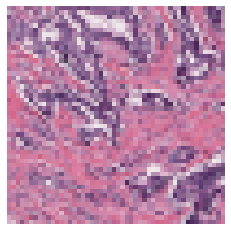

In [ ]:
image_sample = "/content/12935/1/12935_idx5_x1301_y1251_class1.png"
dsize=(50,50)

image = cv2.imread(image_sample)
image = cv2.resize(image, dsize)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')

In [ ]:
resized_images,labels_arr = [],[]
dsize=(50,50)
    
for img in imagePatches[0:20000]:
    full_size_image = cv2.imread(img)
    resized_images.append(cv2.resize(full_size_image, dsize, interpolation=cv2.INTER_CUBIC))
    labels_arr.append(int(img[-5]))

In [ ]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(len(a)-np.sum(b)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(resized_images,labels_arr)

Total number of images: 20000
Number of IDC(-) Images: 14324
Number of IDC(+) Images: 5676
Image shape (Width, Height, Channels): (50, 50, 3)


In [ ]:
X=np.array(resized_images)
Y=pd.Series(labels_arr) 
#X=X/255.0
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, )

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (16000, 50, 50, 3)
Testing Data Shape: (4000, 50, 50, 3)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


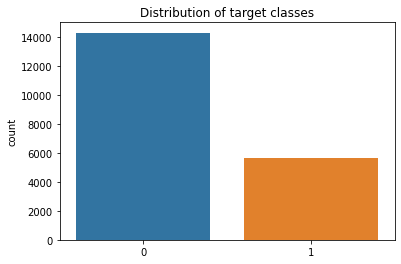

In [ ]:
plt.title("Distribution of target classes")
sns.countplot(Y) 

In [ ]:
# Make Data 1D for compatability upsampling methods
image_shape = 50*50*3

X_train = X_train.reshape(X_train.shape[0], image_shape)
X_test = X_test.reshape(X_test.shape[0], image_shape)

In [ ]:
print("Shape of flattened training data:",X_train.shape,"\nShape of flatened testing data: ",X_test.shape)

Shape of flattened training data: (16000, 7500) 
Shape of flatened testing data:  (4000, 7500)


In [ ]:
# Deal with imbalanced class sizes below

# from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

# Ros = RandomOverSampler(sampling_strategy='auto') 
Rus = RandomUnderSampler(sampling_strategy='auto')

X_trainRusFlat, Y_trainRus = Rus.fit_resample(X_train, Y_train)
X_testRusFlat, Y_testRus = Rus.fit_resample(X_test, Y_test)

#Reshape the images
X_trainRus = X_trainRusFlat.reshape(len(X_trainRusFlat),50,50,3)
X_testRus = X_testRusFlat.reshape(len(X_testRusFlat),50,50,3)

# Encode labels
Y_trainRus = to_categorical(Y_trainRus, num_classes = 2)
Y_testRus = to_categorical(Y_testRus, num_classes = 2)


In [ ]:
print("New shape of Train data =",X_trainRus.shape)
print("New shape of Test data =",X_testRus.shape)

New shape of Train data = (9080, 50, 50, 3)
New shape of Test data = (2272, 50, 50, 3)


In [ ]:
# Helper Functions  Learning Curves and Confusion Matrix 

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotLearningCurve():
    
    plt.figure(figsize=(10,6))
    metrics = np.load('logs.npy', allow_pickle=True)[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')
    
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')

def plot_learning_curve(history):
    
    plt.figure(figsize=(10,6))
    
    #model accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    # model loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
def plot_confusion_matrix(cm, normalize=False, cmap=plt.cm.Blues):
    title='Confusion matrix'
    classes = {0: 'IDC(-)', 1: 'IDC(+)'}
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def build_base_CNN(num_classes=2, input_shape = (50,50, 3)):
        
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='sigmoid'))
    
    return model

In [ ]:
def build_final_CNN(num_classes=2, input_shape = (50,50, 3)):
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3))) 
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='sigmoid')) # output 1 value between 0 and 1 : probability to have cancer
      
    return model

In [ ]:
def eval_model(model, a, b, c, d, model_name=None, Visualize=False):
    
    batch_size = 32
    epochs = 25
    
    model.compile(loss="binary_crossentropy", # Use binary crossentropy as a loss function  
                  optimizer="adam",
                  metrics=['accuracy'])
    
    model.summary()
    if Visualize:
        print("Visualizing your neural network.")
        ann_viz(model, title=model_name, filename=model_name)
    
    history = model.fit(a,b,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data = (c,d),
            callbacks = [MetricsCheckpoint('logs')])
    
    if model_name:
        model.save(model_name+".h5")
    
    score = model.evaluate(c,d, verbose=0)
    print('\n accuracy:', score[1],'\n')
    
    y_pred = model.predict(c)
    map_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
    
    print('\n', classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
    Y_pred_classes = np.argmax(y_pred,axis=1) 
    
    Y_true = np.argmax(d,axis=1) 
    
    plotLearningCurve()
    plt.show()  
    plot_learning_curve(history)
    plt.show()
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plot_confusion_matrix(confusion_mtx) 
    plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 32)        2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 19, 19, 32)        25632     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 9, 9, 32)         

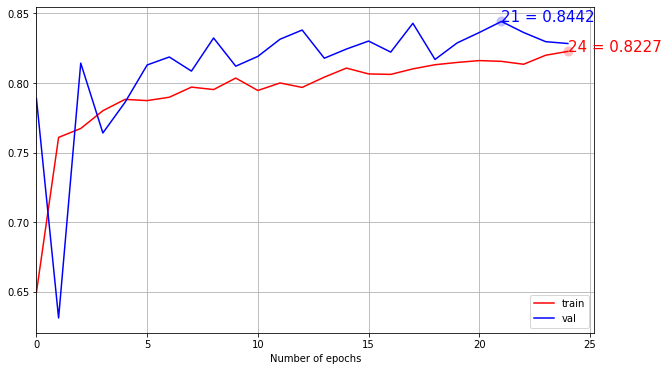

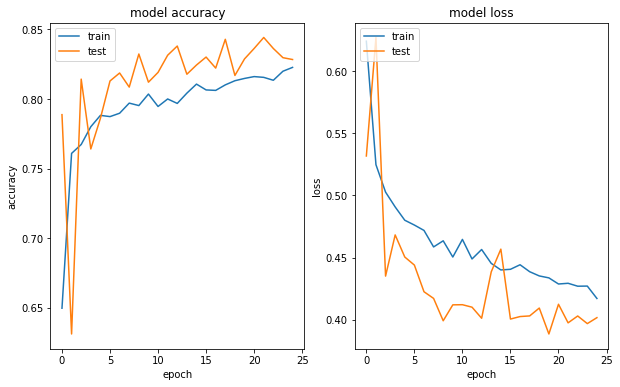

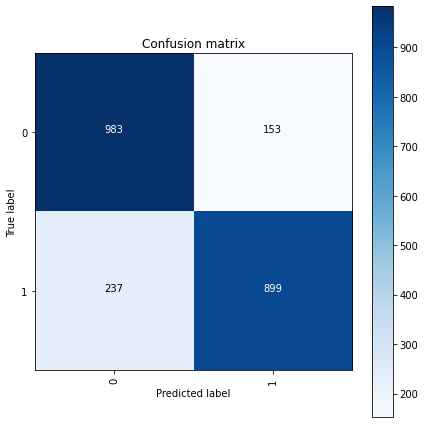

In [ ]:
eval_model(build_base_CNN(),X_trainRus, Y_trainRus, X_testRus, Y_testRus, 'base_CNN', True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 4, 4, 64)         

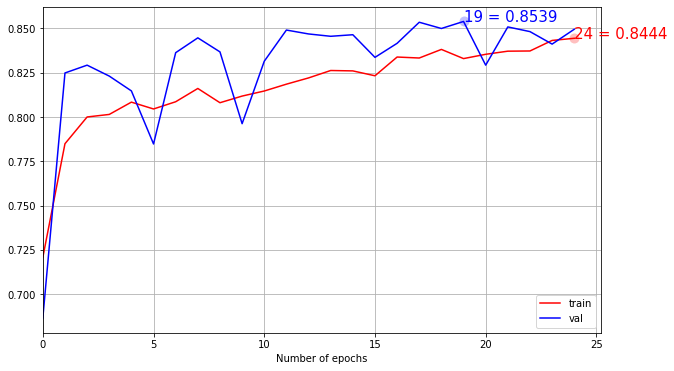

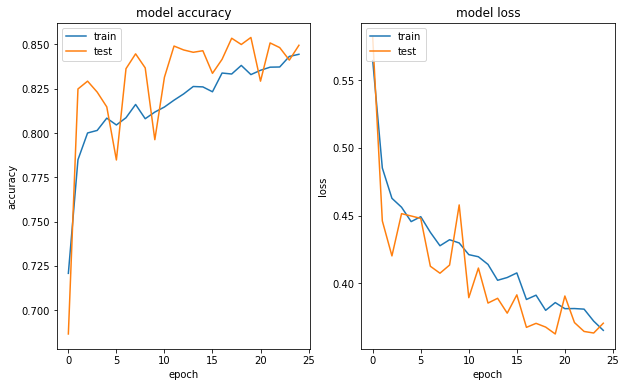

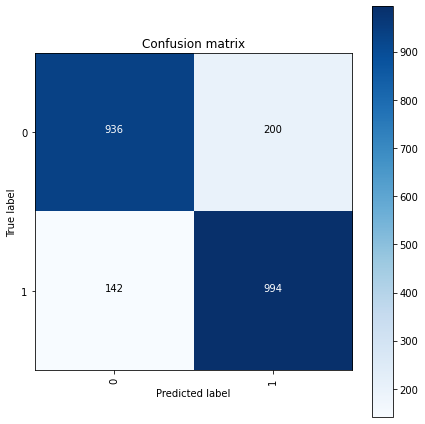

In [ ]:
eval_model(build_final_CNN(),X_trainRus, Y_trainRus, X_testRus, Y_testRus, 'final_CNN', True)

In [ ]:

base_cnnmodel = load_model('base_CNN.h5')
final_cnnmodel = load_model('final_CNN.h5')

In [ ]:
#function to plot image
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    

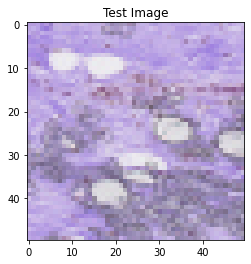

In [ ]:
index1 = 51
img_plot(X_testRus, index1)

In [ ]:
input1 = X_testRus[index1:index1+1]
print('Input Index =',index1)

Input Index = 51


In [ ]:
label1 = Y_testRus[index1].argmax()
base_cnnpred1 = base_cnnmodel.predict(input1)[0].argmax()
final_cnnpred1 = final_cnnmodel.predict(input1)[0].argmax()

print('Predicted Value using base cnn model',base_cnnpred1)
print('Predicted Value using final cnn model',final_cnnpred1)

print("\nTrue Value",label1)

1/1 [==============================] - 0s 232ms/step
Predicted Value using base cnn model 0
Predicted Value using final cnn model 0

True Value 0


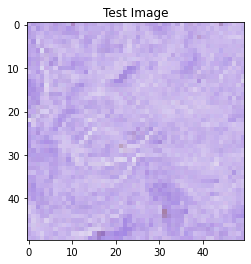

In [ ]:
index2 = 402
img_plot(X_testRus, index2)

In [ ]:
input2 = X_testRus[index2:index2+1]
print('Input Index =',index2)

Input Index = 402


In [ ]:
label2 = Y_testRus[index2].argmax()
base_cnnpred2 = base_cnnmodel.predict(input2)[0].argmax()
final_cnnpred2 = final_cnnmodel.predict(input2)[0].argmax()

print('Predicted Value using base cnn model',base_cnnpred2)
print('Predicted Value using final cnn model',final_cnnpred2)
print("\nTrue Value",label2)

1/1 [==============================] - 0s 13ms/step
Predicted Value using base cnn model 0
Predicted Value using final cnn model 0

True Value 0
